In [137]:
import pandas as pd
import numpy as np
import gc
import utils
import dataset
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
app_train = dataset.get_data('../input/application_train.csv')

load data from ../input/application_train.csv - done in 3s


In [105]:
binary_features = [
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21',
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY',
    'FLAG_MOBIL',
    'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_PHONE',
    'FLAG_EMAIL',
    'CODE_GENDER',
    'EMERGENCYSTATE_MODE'
]

In [106]:
category_features = [
    'NAME_CONTRACT_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'ORGANIZATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START',
    'NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE',
    'OCCUPATION_TYPE',
    'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE',
    'WALLSMATERIAL_MODE'
]

In [107]:
numerical_features = [_ for _ in app_train.columns if app_train[_].dtype == 'float64']
numerical_features = numerical_features + [
    'CNT_CHILDREN',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'DAYS_ID_PUBLISH',
    'REGION_RATING_CLIENT_W_CITY',
    'REGION_RATING_CLIENT',
    'HOUR_APPR_PROCESS_START',
]

In [190]:
def kde(dataset, feature, label='TARGET'):
    for target, rcd in dataset.groupby(label):
        rcd[feature].plot(kind='kde', legend=True, label=target)
        del rcd
    plt.show()
    gc.collect()

In [248]:
def bar(dataset, feature, label='TARGET'):
    x = []
    y = []
    for target, rcd in dataset.groupby(feature):
        x.append(target)
        y.append(len(rcd[rcd[label]==1]) / len(rcd))
        del rcd
    s = sns.barplot(x=x, y=y)
    s.set_xticklabels(s.get_xticklabels(),rotation=45)
    plt.show()
    gc.collect()

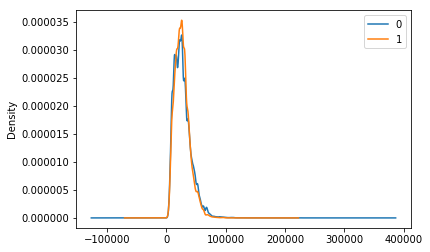

In [318]:
kde(app_train, 'AMT_ANNUITY')

In [316]:
app_train['TOTALAREA_MODE']

0         0.0149
1         0.0714
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12        0.0612
13        0.1417
14        0.3811
15           NaN
16           NaN
17           NaN
18        0.0238
19           NaN
20        0.0530
21           NaN
22        0.0696
23        0.1640
24        0.0967
25        0.0533
26        0.0085
27           NaN
28           NaN
29        0.1227
           ...  
307481       NaN
307482    0.0272
307483    0.0067
307484       NaN
307485       NaN
307486    0.1976
307487       NaN
307488    0.0407
307489    0.0024
307490       NaN
307491       NaN
307492       NaN
307493       NaN
307494       NaN
307495    0.0700
307496       NaN
307497       NaN
307498    0.1778
307499       NaN
307500    0.0890
307501    0.0149
307502       NaN
307503       NaN
307504       NaN
307505    0.2611
307506    0.2898
307507    0.0214
307508    0.79

In [314]:
app_train['TOTALAREA_MODE'].value_counts()

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64

In [272]:
app_train.sort_values('EXT_SOURCE_1')['EXT_SOURCE_1'].plot()

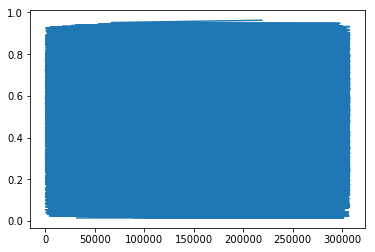

In [273]:
plt.show()

In [285]:
plt.plot(app_train.sort_values('EXT_SOURCE_3')['EXT_SOURCE_3'].tolist())

In [287]:
df = app_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]

In [288]:
corr = df.corr()

In [305]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=1)

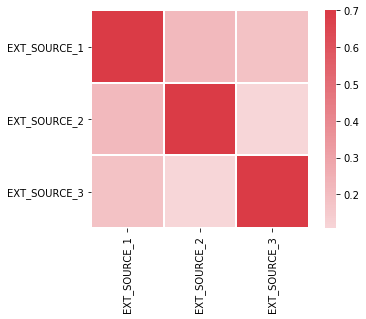

In [306]:
plt.show()

In [307]:
corr

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
EXT_SOURCE_1,1.000000,0.213982,0.186846
EXT_SOURCE_2,0.213982,1.000000,0.109167
EXT_SOURCE_3,0.186846,0.109167,1.000000
